In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [3]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [5]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

Text(0, 0.5, 'Heights')

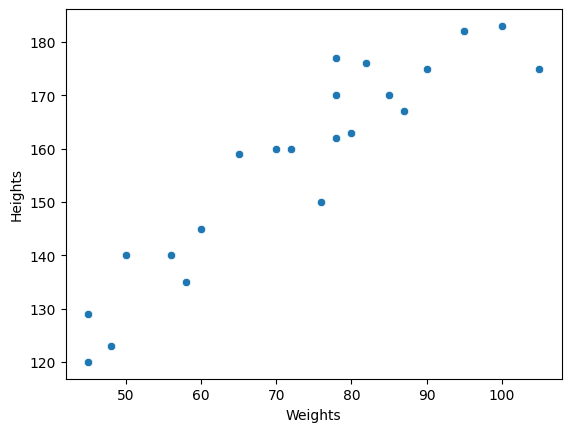

In [13]:
sns.scatterplot(x='Weight', y='Height', data=df)
plt.xlabel('Weights')
plt.ylabel('Heights')

In [14]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

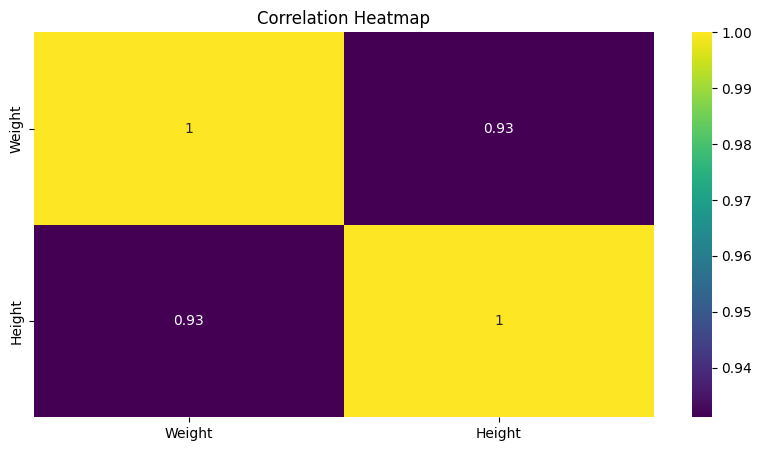

In [18]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')


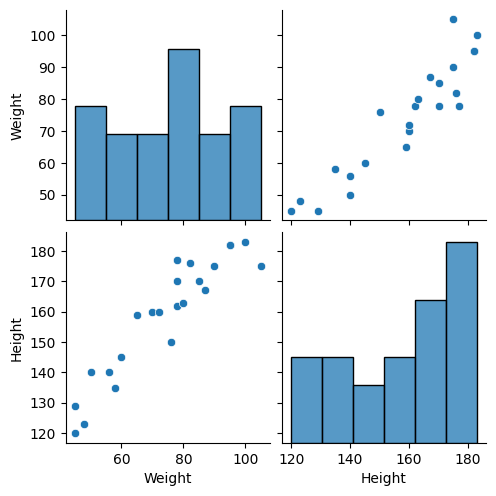

In [19]:
sns.pairplot(df)

In [20]:
# Independent and Dependent Features
X = df[['Weight']] # here the Independent features needs to be in DataFrame or 2D Array
print(type(X))

y = df['Height'] # the Dependent features needs to be in Series or 1D Array
type(y)

<class 'pandas.core.frame.DataFrame'>


pandas.core.series.Series

In [21]:
X_Series = df['Weight']
X_Series.shape

(23,)

In [23]:
np.array(y).shape

(23,)

Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17, 1), (6, 1), (17,), (6,))

Standardization

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [27]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

Applying Simple Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression(n_jobs=-1)
slr.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [30]:
slr.coef_, slr.intercept_

(array([17.2982057]), 156.47058823529412)

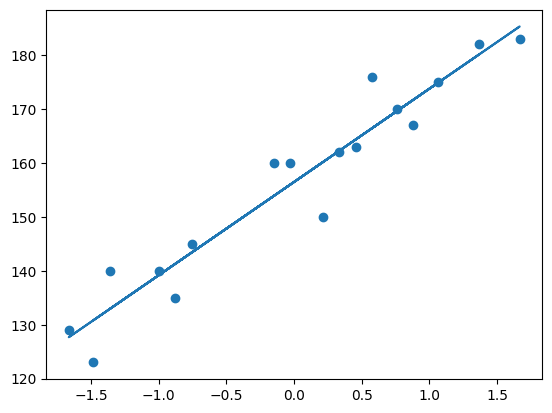

In [37]:
plt.scatter(X_train, y_train)
plt.plot(X_train, slr.predict(X_train))

Test Data Prediction $$ y_pred = 156.47058823529412 + 17.2982057(X_test) $$

In [39]:
y_pred = slr.predict(X_test)
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

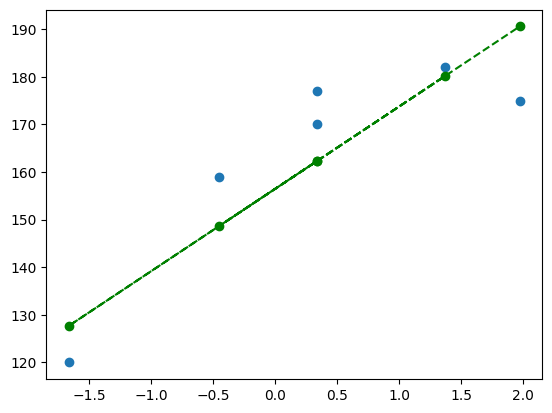

In [49]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, marker='o', color='green', linestyle='dashed')

performance metrics Errors

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2score = r2_score(y_test, y_pred)
adjusted_r2score = 1 - (1 - r2score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

mae, mse, rmse, r2score, adjusted_r2score

(9.66512588679501,
 114.84069295228699,
 10.716374991212605,
 0.7360826717981276,
 0.6701033397476595)

OLS Linear Regression

In [55]:
%pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 17.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]
Note: you may need to restart the kernel to use updated packages.


In [56]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
prediction = model.predict(X_test)
prediction

array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

In [61]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Thu, 14 Aug 2025   Prob (F-statistic):                       0.664
Time:                        11:21:30   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            17.2982     39.138      0.442      0.664     -65.671     100.267
==============================================================================
Omnibus:                        0.135   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.935   Jarque-Bera (JB):                0.203
Skew:                          -0.166   Prob(JB):                        0.904
Kurtosis:                       2.581   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Prediction for New Data

In [60]:
slr.predict(scaler.transform([[72]]))

array([155.97744705])